## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

Я использовал One Hot Encoding, так как мои признаки не имеют конкретного порядка. Также признак имеет малое количество категорий (от двух до трех), поэтому OHE несильно увеличит размер датасета.

In [ ]:
print(f'Количество пропусков в датасете до удаления строк, содержащих хотя бы один пропуск:\n{data.isnull().sum()}\n')

# Удаляем строки, содержащие хотя бы один пропуск.
data = data.dropna()

print(f'Количество пропусков в датасете после удаления строк, содержащих хотя бы один пропуск:\n{data.isnull().sum()}\n')

Количество пропусков в датасете до удаления строк, содержащих хотя бы один пропуск:
Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Количество пропусков в датасете после удаления строк, содержащих хотя бы один пропуск:
Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64



Таким образом, мы очистили датасет от строк, содержащих пропущенные значения.

Произведем Ordinal Encoding для целевой категориальной переменной Species и
произведем One Hot Encoding для остальных категориальных признаков.

In [ ]:
# Ordinal Encoding для Species.
species_order = [['Chinstrap', 'Gentoo', 'Adelie']]
enc = OrdinalEncoder(categories=species_order)
species = enc.fit_transform(data[['Species']])
species = species.astype(int) # Преобразуем тип данных из float в int.
data['Species'] = species

# One Hot Encoding для остальных признаков.
data = pd.get_dummies(data, columns=['Island'], dtype=int)
data = pd.get_dummies(data, columns=['Clutch Completion'], dtype=int)
data = pd.get_dummies(data, columns=['Sex'], dtype=int)
data.head(10)

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_.,Sex_FEMALE,Sex_MALE
0,0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,0,1,0,0,1,0,0,1
1,0,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,0,1,0,0,1,0,1,0
2,1,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,1,0,0,0,1,0,1,0
3,0,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,0,1,0,0,1,0,1,0
4,1,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,1,0,0,0,1,0,1,0
5,1,22,48.1,15.1,209.0,5500.0,8.45738,-26.22664,1,0,0,0,1,0,0,1
6,1,13,51.1,16.5,225.0,5250.0,8.20660,-26.36863,1,0,0,0,1,0,0,1
7,1,392,42.7,13.7,208.0,3950.0,8.14567,-26.59467,1,0,0,1,0,0,1,0
8,2,14,39.6,20.7,191.0,3900.0,8.80967,-26.78958,1,0,0,0,1,0,1,0
9,1,735,46.1,13.2,211.0,4500.0,7.99300,-25.51390,1,0,0,0,1,0,1,0


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [ ]:
X = data.drop('Species', axis=1)
y = data['Species']

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
np.random.seed(52)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Важно использовать stratify для сбалансированного распределения, так как может оказаться, что при распределении в обучающей выборке будет 90% одной категории целевой переменной и 10% других категорий. Он сохраняет такое же распределение, как и во всем объеме данных. Мы применяем именно для y, так как y говорит о распределении категорий. X же служит описание для каждого объекта.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
X_train_filtered = X_train[['Flipper Length (mm)', 'Body Mass (g)']]
X_test_filtered = X_test[['Flipper Length (mm)', 'Body Mass (g)']]

X_train_filtered = std_scaler.fit_transform(X_train_filtered.to_numpy())
X_train_filtered = pd.DataFrame(X_train_filtered, columns=['Flipper Length (mm)', 'Body Mass (g)'])

X_test_filtered = std_scaler.fit_transform(X_test_filtered.to_numpy())
X_test_filtered = pd.DataFrame(X_test_filtered, columns=['Flipper Length (mm)', 'Body Mass (g)'])

# Для каждого классификатора kNN сначала устанавливаем количество соседей и вид метрики.
# Далее обучаем на тренировочной выборке и выводим доли правильных ответов для обоих выборок.

kNN_k1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
kNN_k1.fit(X_train_filtered, y_train)
kNN_k1_train_accuracy = kNN_k1.score(X_train_filtered, y_train)
kNN_k1_test_accuracy = kNN_k1.score(X_test_filtered, y_test)

kNN_k3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
kNN_k3.fit(X_train_filtered, y_train)
kNN_k3_train_accuracy = kNN_k3.score(X_train_filtered, y_train)
kNN_k3_test_accuracy = kNN_k3.score(X_test_filtered, y_test)

kNN_k5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
kNN_k5.fit(X_train_filtered, y_train)
kNN_k5_train_accuracy = kNN_k5.score(X_train_filtered, y_train)
kNN_k5_test_accuracy = kNN_k5.score(X_test_filtered, y_test)

kNN_k10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
kNN_k10.fit(X_train_filtered, y_train)
kNN_k10_train_accuracy = kNN_k10.score(X_train_filtered, y_train)
kNN_k10_test_accuracy = kNN_k10.score(X_test_filtered, y_test)

kNN_k15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
kNN_k15.fit(X_train_filtered, y_train)
kNN_k15_train_accuracy = kNN_k15.score(X_train_filtered, y_train)
kNN_k15_test_accuracy = kNN_k15.score(X_test_filtered, y_test)

kNN_k25 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
kNN_k25.fit(X_train_filtered, y_train)
kNN_k25_train_accuracy = kNN_k25.score(X_train_filtered, y_train)
kNN_k25_test_accuracy = kNN_k25.score(X_test_filtered, y_test)

# Создаем датасет с ответами по тренировочной и тестовой выборке в зависимости от количества соседей,
# округлив значения до двух знаков после запятой.
knn_results = pd.DataFrame({'NN': [1, 3, 5, 10, 15, 25],
      'Train': [kNN_k1_train_accuracy, kNN_k3_train_accuracy, kNN_k5_train_accuracy, kNN_k10_train_accuracy, kNN_k15_train_accuracy, kNN_k25_train_accuracy],
      'Test': [kNN_k1_test_accuracy, kNN_k3_test_accuracy, kNN_k5_test_accuracy, kNN_k10_test_accuracy, kNN_k15_test_accuracy, kNN_k25_test_accuracy]
      }).round(2)

knn_results

,NN,Train,Test
0,1,0.96,0.76
1,3,0.85,0.79
2,5,0.83,0.83
3,10,0.80,0.86
4,15,0.81,0.81
5,25,0.81,0.81


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

В связи с тем, что в коде ниже передаем в переменную X numpy-массив, воспользуемся библиотекой warnings,
так как мы передаем "датафрейм" без названия столбцов.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

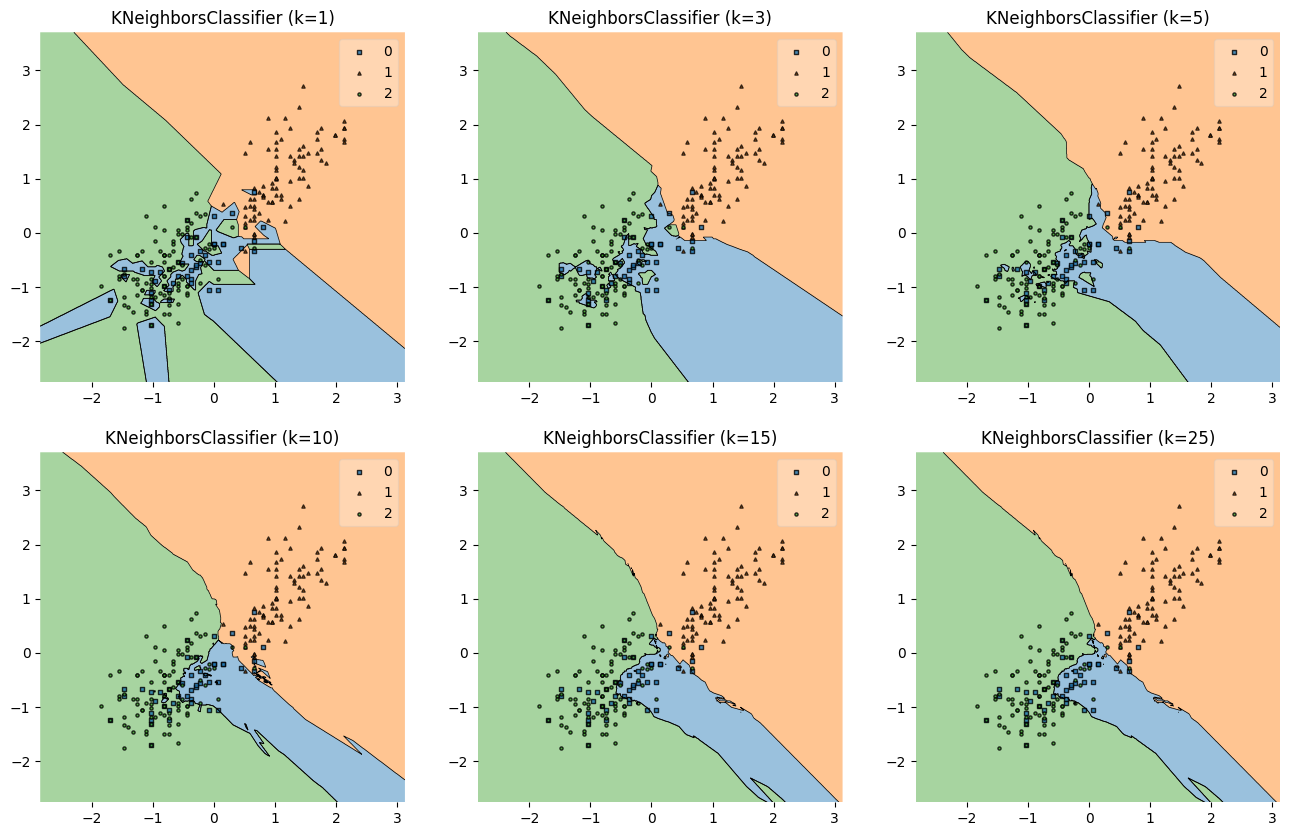

In [ ]:
n_rows, n_cols = 2, 3
gs = gridspec.GridSpec(n_rows, n_cols)
itertools.product()
fig = plt.figure(figsize=(16, 10))
labels = ['KNeighborsClassifier (k=1)', 'KNeighborsClassifier (k=3)', 'KNeighborsClassifier (k=5)', 'KNeighborsClassifier (k=10)',
  'KNeighborsClassifier (k=15)', 'KNeighborsClassifier (k=25)']


# Взято из документации.
for clf, lab, grd in zip([kNN_k1, kNN_k3, kNN_k5, kNN_k10, kNN_k15, kNN_k25],
                         labels,
                         list(itertools.product(range(2), range(3)))):

    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(
        X=np.array(X_train_filtered),
        y=np.array(y_train),
        clf=clf,
        scatter_kwargs={'s': 5}
    )
    plt.title(lab)
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

- При k=1 и k=5 мы явно можем наблюдать признаки переобучения: модель отлично показывает себя на обучающей выборке,
но плохо справляется на тестовых данных.
- При больших k границы становятся более гладкими. Заметим, что лучшие результаты выдают k=5 и k=10. Они имеют примерно сопоставимые доли правильных ответов на обучающей и тестовой выборках. При k=5 доли равны, а при k=10 отличается на 5 сотых.
- При k=15 и k=25 нетрудно заметить кучки синих объектов находящихся в зеленой области, что свидетельствует о недообучении модели.

Таким образом, выбор падает на k=5 и k=10, так как при этих k модели имеет наибольшую точность на тестовой выборке и несильную разницу с обучающей, а также наиболее верную классификацию объектов и сбалансированное сглаживание.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

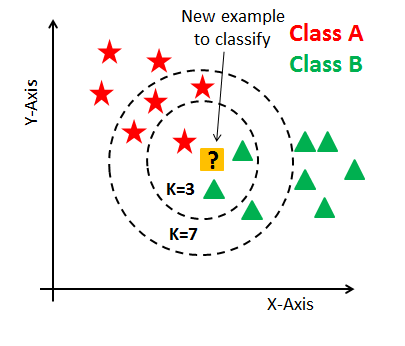

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        if not isinstance(k, int) or k <= 0:
            raise ValueError('k должно быть целым положительным число!')

        self.k = k
        self.X = None
        self.Y = None


    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)

        if self.X.shape[0] != self.y.shape[0]:
            raise ValueError('Для каждого объекта должна существовать целевая переменная!')


    def predict(self, X_test):
        if self.X is None or self.y is None:
            raise ValueError('Модель не обучена. Вызовите fit(X, y).')

        if self.k > self.X.shape[0]:
            raise ValueError('k больше количества объектов обучающей выборки!')

        if X_test.shape[1] != self.X.shape[1]:
            raise ValueError('Число признаков в тестовой выборке не совпадает с количеством признаков в обучающей!')

        predicts = []
        X_test = np.array(X_test)

        for obj in X_test:
          dists = [self.count_distance(obj, x) for x in self.X]
          k_indexes = np.argsort(dists)[:self.k]
          k_nearest = [self.y[index] for index in k_indexes]

          most_common = Counter(k_nearest).most_common(1)
          predicts.append(most_common[0][0])

        predicts = np.array([int(n) for n in predicts])
        return predicts


    def count_distance(self, x, y):
      dist = np.linalg.norm(x-y)
      return dist

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
k_list = [1, 3, 5, 10, 15, 20, 25]
ans = []
accuracies = pd.DataFrame(columns = ['NN', 'Accuracy'])
accuracies = accuracies.astype({'NN': 'int32', 'Accuracy': 'float64'})

for k in k_list:
    knn = KNN(k=k)
    knn.fit(X_train_filtered, y_train)
    y_pred = knn.predict(X_test_filtered)
    score = np.round(accuracy_score(y_pred, y_test), 2)
    ans.append((k, score))

    accuracies = pd.concat([accuracies, pd.DataFrame([[k, score]], columns = ['NN', 'Accuracy'])], ignore_index=True)
    print(f'Точность KNN с k={k} составляет {score}')


res = sorted(ans, key=lambda x: x[1])
best_k, best_score = res[-1][0], res[-1][1]

print(f'\nЛучший k: {best_k} с точностью {round(best_score, 4)} на тестовой выборке.')

Точность KNN с k=1 составляет 0.76
Точность KNN с k=3 составляет 0.81
Точность KNN с k=5 составляет 0.84
Точность KNN с k=10 составляет 0.85
Точность KNN с k=15 составляет 0.81
Точность KNN с k=20 составляет 0.82
Точность KNN с k=25 составляет 0.82

Лучший k: 10 с точностью 0.85 на тестовой выборке.


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
print(f'Количество пропуско в датасете до удаления строк, содержащих хотя бы один пропуск:\n{data.isnull().sum()}\n')

# Удаляем столбцев "Unnamed: 0", так как он буквально повторяет нумерацию строк.
del data['Unnamed: 0']

data.head(5)

Количество пропуско в датасете до удаления строк, содержащих хотя бы один пропуск:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Итак, мы убедились, что в датасете нет пропущенных значений.

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

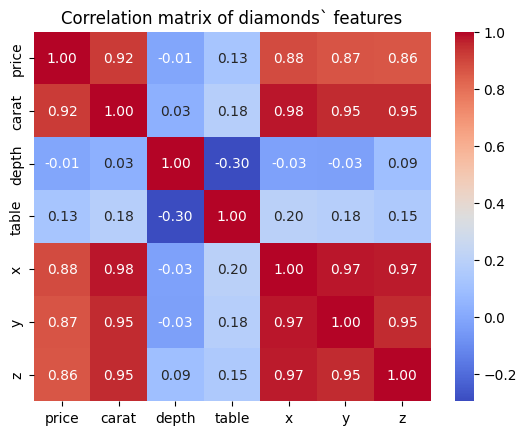

In [ ]:
# Отбираем только целевую переменную и вещественные признаки.
numeric_only = data[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']]
numeric = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Считаем матрицу корреляций и строим heatmap для нее.
corr_matrix = numeric_only.corr()
fig = sns.heatmap(corr_matrix, annot=True, fmt='0.2f', cmap = 'coolwarm')
plt.title('Correlation matrix of diamonds` features');

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [ ]:
data = pd.get_dummies(data, dtype='int')

data.head(5)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [ ]:
cols = X_train.columns.tolist()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.to_numpy())
X_test = scaler.transform(X_test.to_numpy())

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

При отсутствии масштабирования могут меняться единицы измерения, соответственно, нужно корректировать коэффициенты при признаке. После масштабирования признак мы можем интерпретировать коэффициенты линейной регрессии, например, можно утверждать, что, чем больше вес при признаке, тем больше признак важнее. И наоборот.


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = round(mean_squared_error(y_train, y_pred_train), 2)
mse_test = round(mean_squared_error(y_test, y_pred_test), 2)

print(f'MSE на тренировочной выборке: {mean_squared_error(y_train, y_pred_train):.2f}')
print(f'MSE на тестовой выборке: {mean_squared_error(y_test, y_pred_test):.2f}')

MSE на тренировочной выборке: 1277734.22
MSE на тестовой выборке: 1275985.71


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

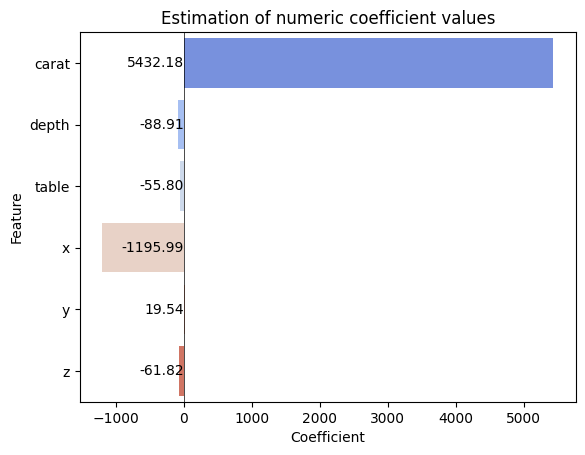

In [ ]:
coefs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
x_vert_line = 0

fig = sns.barplot(data=coefs[coefs['Feature'].isin(numeric)], x='Coefficient', y='Feature', hue='Feature', palette='coolwarm');
plt.title('Estimation of numeric coefficient values');
plt.axvline(x_vert_line, color = 'black', linewidth=0.5);

for p in fig.patches:
    fig.text(0.5,
            p.get_y() + p.get_height() / 2,
            f'{p.get_width():.2f}',
            ha='right',
            va='center',
            color='black')

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso = Lasso(10.0).fit(X_train, y_train)
ridge = Ridge(10.0).fit(X_train, y_train)

coefs['Coefficient Lasso'] = lasso.coef_
coefs['Coefficient Ridge'] = ridge.coef_
coefs

,Feature,Coefficient,Coefficient Lasso,Coefficient Ridge
0,carat,5432.175375,4930.619472,5390.013771
1,depth,-88.907117,-51.723240,-84.303952
2,table,-55.797005,-41.683564,-55.475734
3,x,-1195.991585,-673.046349,-1135.368370
4,y,19.544615,-0.000000,18.060057
5,z,-61.815437,-84.436676,-79.844295
6,cut_Fair,-133.579482,-135.722239,-133.813933
7,cut_Good,-44.802480,-46.805450,-44.905298
8,cut_Ideal,55.531875,45.046337,55.550671
9,cut_Premium,17.860965,0.000000,17.771028


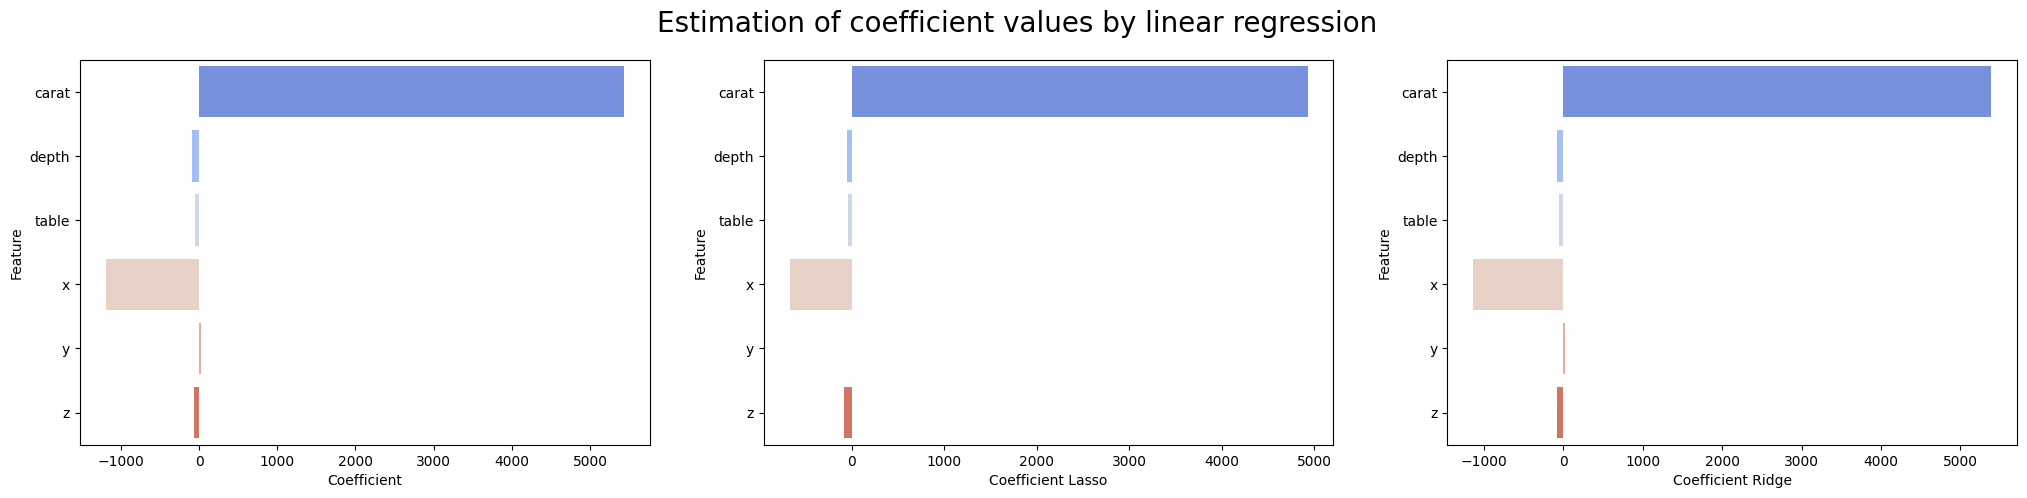

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (25, 5))
plt.suptitle('Estimation of coefficient values by linear regression', fontsize=20)
sns.barplot(data=coefs[coefs['Feature'].isin(numeric)], x='Coefficient', y='Feature', hue='Feature', palette='coolwarm', ax = axs[0])
sns.barplot(data=coefs[coefs['Feature'].isin(numeric)], x='Coefficient Lasso', y='Feature', hue='Feature', palette='coolwarm', ax = axs[1])
sns.barplot(data=coefs[coefs['Feature'].isin(numeric)], x='Coefficient Ridge', y='Feature', hue='Feature', palette='coolwarm', ax = axs[2]);

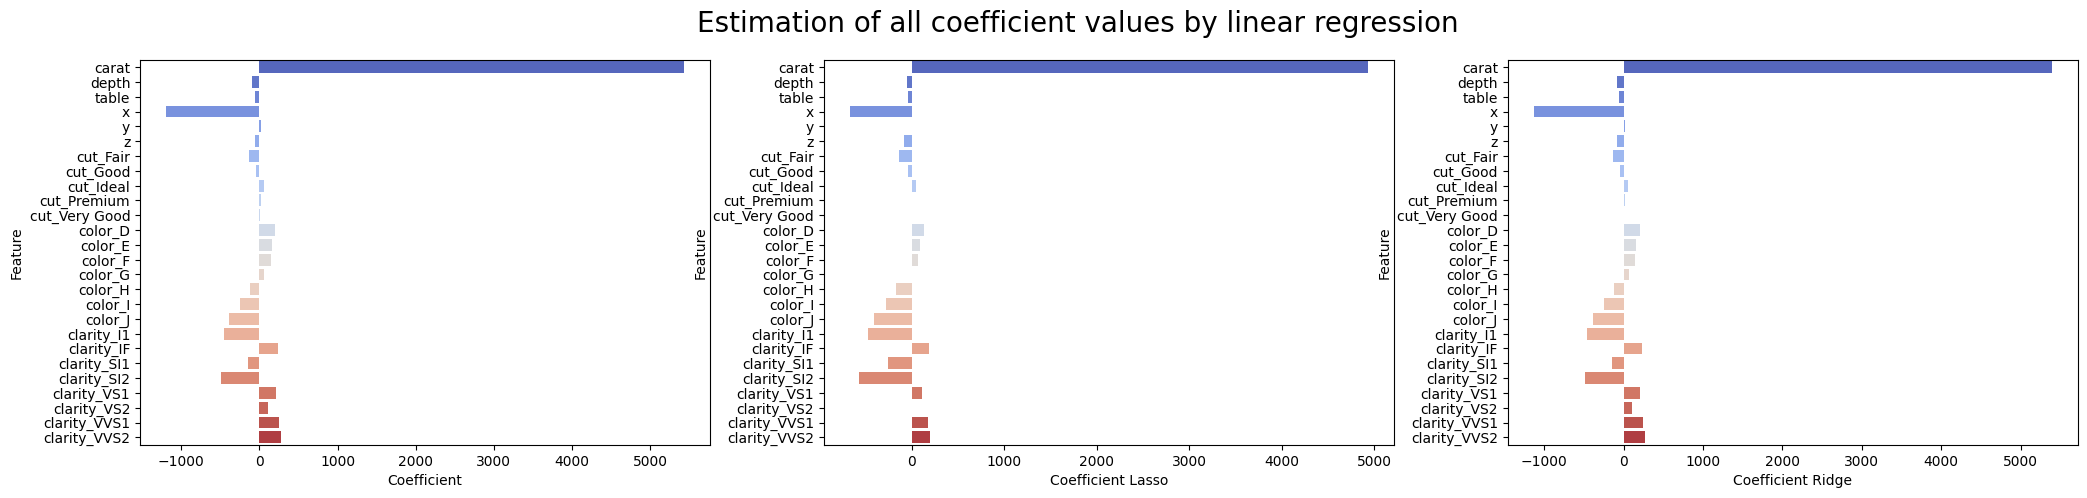

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (25, 5))
fig.suptitle('Estimation of all coefficient values by linear regression', fontsize=20)
sns.barplot(data=coefs, x='Coefficient', y='Feature', hue='Feature', palette='coolwarm', ax = axs[0])
sns.barplot(data=coefs, x='Coefficient Lasso', y='Feature', hue='Feature', palette='coolwarm', ax = axs[1])
sns.barplot(data=coefs, x='Coefficient Ridge', y='Feature', hue='Feature', palette='coolwarm', ax = axs[2]);

Заметим, что коэффициенты Ridge-регрессии несильно изменились в сравнении с исходной моделью. Ridge уменьшил, но не занулил, значит, признаки были коррелированы, но все-таки влияли на модель. Был занулен только вес при признаке Cut-Very Good.
У Lasso-регрессии некоторые коэффициенты вовсе занулились. Модель занулила y, cut_Premium, cut_Very Good, color_G, clarity_VS2. Эти признаки сильно коррелировали с другими, поэтому модель приняла решение избавиться от них. Напомним, что в Ridge был занулен только один коэффициент, поэтому проблема коллинеарности в данной модели драматична.

Также в данном случае ввиду того, что Lasso обнулил несколько весов, то можем сделать вывод, что признаки при этих весах были коррелируемы с другими признакими, поэтому Lasso обнулило их. Также они могли быть достаточно слабыми и неинформативными для модели, поэтому Lasso принял решение их занулить.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

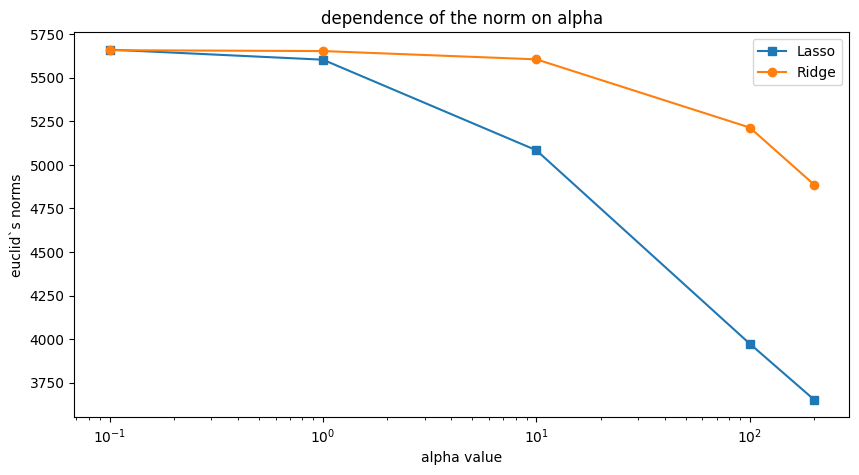

In [ ]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms, ridge_norms = [], []

# Заполняем массивы эвклидовых норм коэффициентов в зависимости от значения alpha.
for alpha in alphas:
  lasso = Lasso(alpha).fit(X_train, y_train)
  lasso_coeffs = lasso.coef_
  lasso_norms.append(np.linalg.norm(lasso_coeffs))

  ridge = Ridge(alpha).fit(X_train, y_train)
  ridge_coeffs = ridge.coef_
  ridge_norms.append(np.linalg.norm(ridge_coeffs))

# Создаем фигуру и рисум графики.
plt.figure(figsize=(10, 5))
plt.plot(alphas, lasso_norms, label='Lasso', marker='s')
plt.plot(alphas, ridge_norms, label='Ridge', marker='o')

# Настраиваем рисунок. Так как данные подаются в формате экспоненциальная записи,
# а также значения на малых альфа достаточно похожи друг с другом сравнении с
# с большим альфа, то пусть x-шкала будет логарифмической.
plt.xscale('log')
plt.title('dependence of the norm on alpha')
plt.xlabel('alpha value')
plt.ylabel('euclid`s norms')
plt.legend()
plt.show()

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
cv = LassoCV(alphas = alphas, cv=5, random_state=0).fit(X_train, y_train)

mse_path = cv.mse_path_
mse_mean = mse_path.mean(axis=1)
mse_ans = pd.DataFrame({'Alpha': cv.alphas_, 'MSE_mean': mse_mean})

mse_ans.sort_values('MSE_mean').head(1)['Alpha']

,Alpha
3,1.0


Лучшим альфа является 𝛼 = 1.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
from sklearn import linear_model

In [ ]:
lasso_final = linear_model.Lasso(alpha=1)
lasso_final.fit(X_train, y_train)
coefs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': clf_lasso.coef_})
coefs

,Feature,Coefficient
0,carat,4930.619472
1,depth,-51.723240
2,table,-41.683564
3,x,-673.046349
4,y,-0.000000
5,z,-84.436676
6,cut_Fair,-135.722239
7,cut_Good,-46.805450
8,cut_Ideal,45.046337
9,cut_Premium,0.000000


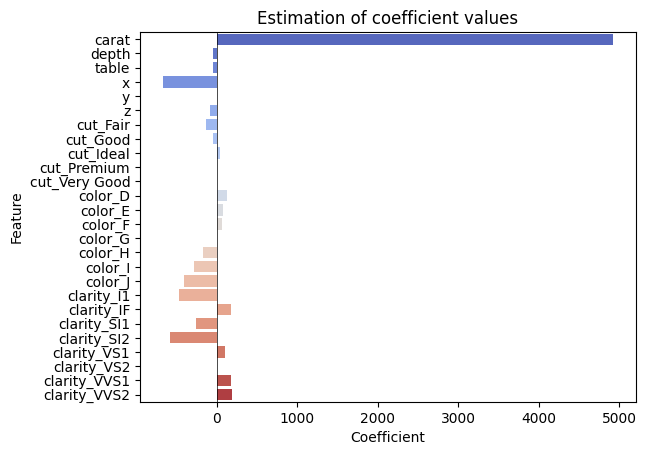

In [ ]:
fig = sns.barplot(data=coefs, x='Coefficient', y='Feature', hue='Feature', palette='coolwarm');
plt.title('Estimation of coefficient values');
plt.axvline(x_vert_line, color = 'black', linewidth=0.5);

Карат - это по факту вес бриллианта, поэтому он сильно влияет на модель. Длина бриллианта, наоборот, сильна тянет его стоимость вниз.
Признаков, сильно повышающих стоимость, более не наблюдается, что не сказать про отрицательно влияющих на стоимость: clarity_SI2, clarity_I1, color_J. SI1 и I1 являются худшими по чистоте типами, color_J же является худшим цветом.
Для контраста, clarity_IF, clarity_VVS1, clarity_VVS2 считаются хорошими бриллиантами по чистоте, что и отражается на графике.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
y_pred_lasso = lasso_final.predict(X_test)
mse_lasso = round(mean_squared_error(y_test, y_pred_lasso))

print(f'MSE на тестовой выборке для Lasso-регрессии равно {mse_lasso}.')

mse_values = pd.DataFrame({'Model': ['Lineal Regression', 'Lasso-regression'], 'MSE': [mse_test, mse_lasso]})
mse_values

MSE на тестовой выборке для Lasso-регрессии равно 1274871.


,Model,MSE
0,Lineal Regression,1275985.71
1,Lasso-regression,1274871.00


Можем обратить внимание, что MSE у Lasso-регрессии несильно отличается от MSE в стандартной линейной регрессии. Такое небольшое отклонение связано с тем, что проблема мультиколлинеарности признаков в нашей модели имеет место быть. Если важна игнорирование наименее полезных для модели признаков, то стоит воспользоваться Lasso.
